# Introduction

Before we start, a bit of context on what the problem is and how I want to solve it. First of all, I am a very big music fan and I listen to a lot of different and strange stuff. Whenever I am in a more happy mood, I listen to one playlist, but when I fell more in a sad mood, I listen to another playlist. I have done this for about 3 years now. And to define which songs should go to each playlist, I had to listen and classify it by my standards. However, when I started learning a bit about Data Science, I realized that this could be automatizated. So I started working on it. <br/>
Therefore, I want to build a model that can classify my Spotify songs into two playlists. With Spotify's songs features, I have already a labeled dataset. So, all I need to do is build the model.

# Configuration

In [50]:
import os
import pandas             as pd
import numpy              as np
import seaborn            as sns
import random             as rand


from sklearn.linear_model       import LogisticRegression
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import StandardScaler
from sklearn.feature_selection  import chi2
from sklearn.metrics            import classification_report
from matplotlib                 import pyplot as plt 
from IPython.core.display       import display, HTML

In [16]:
# -------------------------------------------
# Jupyter notebook Settings
# -------------------------------------------
display( HTML( '<style>.container { width:95% !important; }</style>' ) )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )

# -------------------------------------------
# Plotting Settings
# -------------------------------------------
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['font.size'] = 24
sns.set()
sns.set_style("whitegrid")
sns.despine(right = True)
pd.options.display.float_format = '{:.2f}'.format

<Figure size 720x720 with 0 Axes>

# Getting Dataset

In [17]:
df_raw = pd.read_csv('../csv/my_music_dataset.csv')
df_raw = df_raw.drop(columns=['Unnamed: 0'])
df_raw.head()

,id,url,name,artist,album,explicit,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
0,3eFepXGITXNDXXHUNqouxi,https://open.spotify.com/track/3eFepXGITXNDXXH...,Shake Me Down,Cage The Elephant,Thank You Happy Birthday,False,54,211373,9,1,4,0.46,0.61,0.03,0.00,0.00,0.07,0.13,105.11,0
1,51pQ7vY7WXzxskwloaeqyj,https://open.spotify.com/track/51pQ7vY7WXzxskw...,Stairway to Heaven - 1990 Remaster,Led Zeppelin,Led Zeppelin IV,False,67,478173,7,1,4,0.35,0.34,0.03,0.57,0.01,0.18,0.21,84.20,0
2,6QHGyXR0m3PDStlyHN8dYK,https://open.spotify.com/track/6QHGyXR0m3PDStl...,Stay Alive,José González,Stay Alive (From The Secret Life Of Walter Mitty),False,16,266906,6,1,4,0.72,0.30,0.04,0.70,0.14,0.09,0.33,130.00,0
3,3usVf6rhG6vDjcodeavHde,https://open.spotify.com/track/3usVf6rhG6vDjco...,Sozinho - Live In Brazil / 1998,Caetano Veloso,Prenda Minha (Live),False,1,190496,11,0,3,0.48,0.28,0.19,0.63,0.00,0.91,0.53,83.74,0
4,0sTr29gwWE4wIxjMLytsOu,https://open.spotify.com/track/0sTr29gwWE4wIxj...,If You Believe,Sasha,Greatest Hits,False,42,239973,5,1,1,0.37,0.52,0.04,0.12,0.00,0.11,0.48,82.51,0


In [18]:
df_raw.describe()

,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
count,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00
mean,41.81,223132.47,5.38,0.55,3.94,0.64,0.59,0.09,0.34,0.03,0.19,0.55,117.29,0.71
std,23.96,52335.17,3.61,0.50,0.33,0.14,0.20,0.10,0.30,0.13,0.17,0.23,27.75,0.45
min,0.00,53454.00,0.00,0.00,1.00,0.16,0.01,0.02,0.00,0.00,0.02,0.04,54.75,0.00
25%,23.00,189379.50,2.00,0.00,4.00,0.54,0.45,0.04,0.06,0.00,0.10,0.37,95.01,0.00
50%,48.00,217321.00,5.00,1.00,4.00,0.64,0.61,0.05,0.25,0.00,0.12,0.56,115.99,1.00
75%,60.00,252058.25,9.00,1.00,4.00,0.74,0.76,0.10,0.57,0.00,0.23,0.74,133.00,1.00
max,93.00,505482.00,11.00,1.00,5.00,0.98,0.99,0.87,0.99,0.97,0.98,0.98,212.14,1.00


# Exploration

In order to understand better the dataset, we must explore it. <br/>
Searching for patterns and also seeing what how the data is distributed.

In [19]:
df_0 = df_raw.loc[df_raw['label'] == 0].copy()
df_0.describe()

,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
count,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00
mean,42.38,219743.38,5.13,0.65,3.88,0.59,0.44,0.07,0.54,0.05,0.17,0.45,114.21,0.00
std,22.84,59538.90,3.54,0.48,0.45,0.15,0.19,0.08,0.30,0.17,0.14,0.22,28.38,0.00
min,0.00,53454.00,0.00,0.00,1.00,0.16,0.01,0.02,0.00,0.00,0.03,0.04,58.10,0.00
25%,28.00,181549.50,2.00,0.00,4.00,0.50,0.31,0.03,0.27,0.00,0.10,0.29,90.36,0.00
50%,48.00,215839.50,5.00,1.00,4.00,0.59,0.42,0.04,0.57,0.00,0.11,0.43,112.06,0.00
75%,59.00,255551.75,8.00,1.00,4.00,0.70,0.57,0.06,0.80,0.01,0.18,0.61,131.32,0.00
max,86.00,478173.00,11.00,1.00,5.00,0.93,0.91,0.57,0.99,0.97,0.98,0.97,204.03,0.00


In [20]:
df_1 = df_raw.loc[df_raw['label'] == 1].copy()
df_1.describe()

,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
count,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00,1358.00
mean,41.58,224520.05,5.48,0.51,3.96,0.66,0.66,0.10,0.25,0.02,0.20,0.60,118.55,1.00
std,24.40,49038.20,3.63,0.50,0.26,0.14,0.17,0.11,0.25,0.11,0.18,0.22,27.40,0.00
min,0.00,97000.00,0.00,0.00,1.00,0.20,0.06,0.02,0.00,0.00,0.02,0.04,54.75,1.00
25%,21.25,192095.50,2.00,0.00,4.00,0.57,0.53,0.04,0.04,0.00,0.09,0.44,96.01,1.00
50%,47.00,217797.50,6.00,1.00,4.00,0.67,0.67,0.06,0.16,0.00,0.13,0.61,117.97,1.00
75%,61.00,251139.75,9.00,1.00,4.00,0.76,0.79,0.13,0.41,0.00,0.25,0.77,134.01,1.00
max,93.00,505482.00,11.00,1.00,5.00,0.98,0.99,0.87,0.97,0.97,0.98,0.98,212.14,1.00


In [21]:
# Defining Features
features = [
    "popularity",
    "key",
    "time_signature",
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo"
]

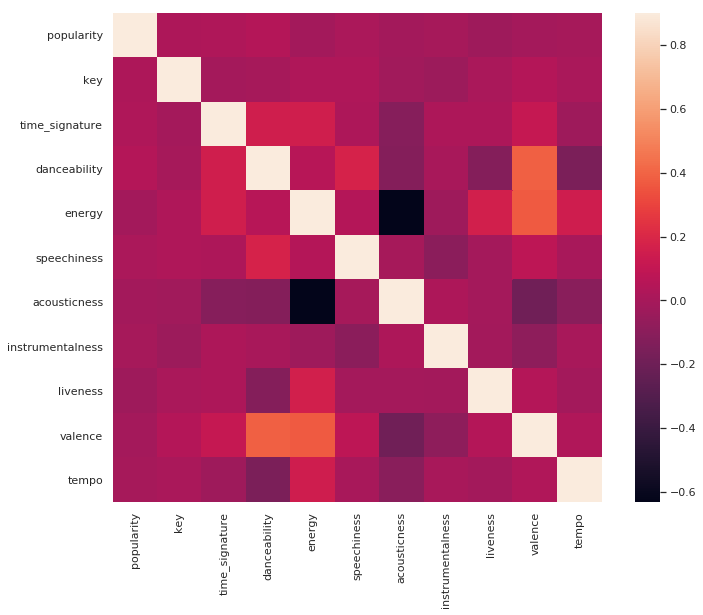

In [22]:
# Plotting the correlation matrix to see if there is any correlation between any features
corrmat = df_raw[features].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

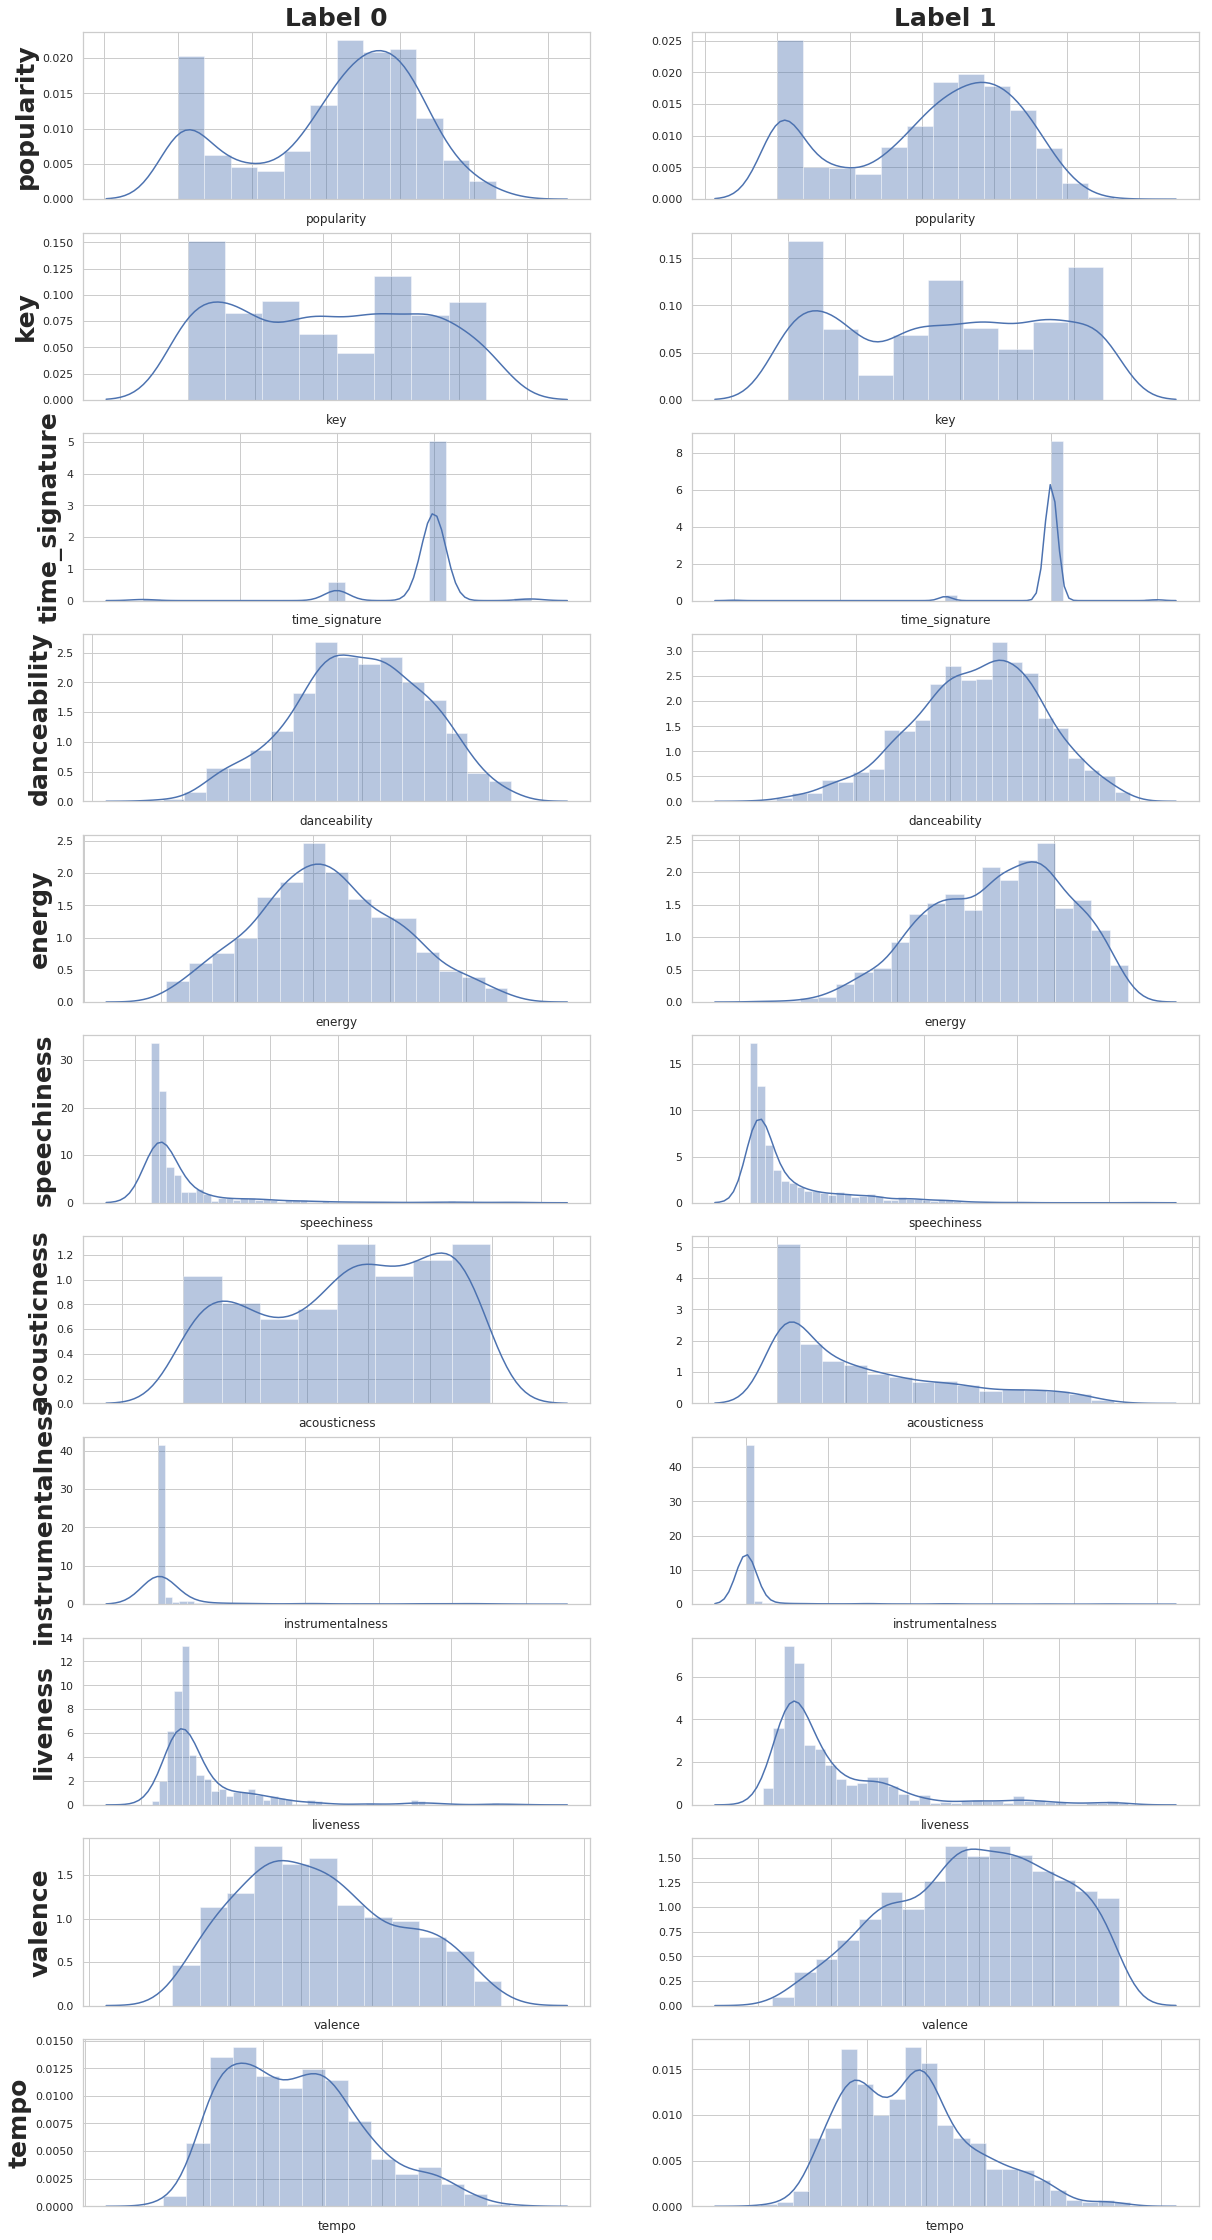

In [23]:
# Printing the distribution of each label, in order to see if there is any difference in distribution
# Setting subplots
fig, axs = plt.subplots(len(features), 2, figsize=(20, 40))

# Plotting
axs[0,0].set_title('Label 0', fontweight="bold", size=25)
axs[0,1].set_title('Label 1', fontweight="bold", size=25)
for index, col in enumerate(features):
    axs[index,0].set_ylabel(col, fontweight="bold", fontsize=25)
    sns.distplot(df_0[col], ax=axs[index,0])
    sns.distplot(df_1[col], ax=axs[index,1])
    axs[index,0].set_xticklabels([])
    axs[index,1].set_xticklabels([])
    
plt.show()

# Feature Selection

To select the features that matter the most to the model, I am using the chi2 test. <br/>
This test consist in verifying how relevant that features is and it does that by calculating the p-value for each feature. <br/>
The p-value here explains, in a very rough manner, how much is this feature interfering with the result, in this case the column 'label'.<br/>
A high p-value shows that this feature does not influence much on the result and a low p-value shows that the feature influence a lot. <br/>
Therefore, we must choose a boundry, where does the p-value becomes relevant enough. Usually, this boundry is set at 0.05 (95% confidence interval). <br/>
So, we filter out every feature with a p-value higher than 0.05. <br/>

In [41]:
# Getting Dataset
df_features = df_raw[features].copy()
df_labels = df_raw['label'].copy()

score, pvalues = chi2(df_features, df_labels)

df_feature_selection = pd.DataFrame()
df_feature_selection['features'] = features
df_feature_selection['score'] = score
df_feature_selection['pvalues'] = pvalues
df_feature_selection

,features,score,pvalues
0,popularity,6.03,0.01
1,key,8.87,0.00
2,time_signature,0.67,0.41
3,danceability,2.65,0.10
4,energy,32.69,0.00
5,speechiness,5.30,0.02
6,acousticness,94.32,0.00
7,instrumentalness,10.53,0.00
8,liveness,2.64,0.10
9,valence,14.59,0.00


In [42]:
# Filtering all features with p-value > 0.05
selected_features = df_feature_selection.loc[df_feature_selection['pvalues'] < 0.05]['features']
selected_features

0           popularity
1                  key
4               energy
5          speechiness
6         acousticness
7     instrumentalness
9              valence
10               tempo
Name: features, dtype: object

# Scalling

So that our model can understand each feature equally, we must scalle them. <br/>
That is, without changing the distribution, setting the mean to 0 and the standard deviation to 1. <br/>
Having all features scalled, the model can attribute the proper weight to each one. <br/>
To do that, I am using StandardScaler. <br/>

In [45]:
ss = StandardScaler()
df_features_scalled = pd.DataFrame(ss.fit_transform(df_raw[selected_features]), columns=[selected_features])
df_features_scalled.describe()

features,popularity,key,energy,speechiness,acousticness,instrumentalness,valence,tempo
count,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00,1914.00
mean,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.75,-1.49,-2.85,-0.71,-1.13,-0.26,-2.26,-2.25
25%,-0.79,-0.94,-0.71,-0.59,-0.93,-0.26,-0.81,-0.80
50%,0.26,-0.10,0.07,-0.44,-0.29,-0.26,0.02,-0.05
75%,0.76,1.01,0.80,0.10,0.79,-0.25,0.79,0.57
max,2.14,1.56,1.93,7.75,2.23,7.37,1.85,3.42


# Model Training

Since I am classifying into two categories, a model that would fit well is the Logistic Regression. <br/>
In order to understand this model, the best way, in my opinion, is to compare it to the Linear Regression. <br/>
![Linear Regression](https://miro.medium.com/max/725/1*Ubge8qVlc4Xk58H1oMp4Zw.jpeg)<br/>
As we can see in the image, the Logistic Regression works similarly as the Linear one. However instead of fitting a line, it fits a S shape function (Sigmoid Function). <br/>
Since the results we want are discrete and not continuos, the logistic regression can more accurately predict this categorical value.<br/>
More about the Logistic Regression [here](https://medium.com/datadriveninvestor/logistic-regression-18afd48779ce)

In [46]:
# Splitting Dataset
df_features_train, df_features_test, df_labels_train, df_labels_test = train_test_split(df_features_scalled, df_labels, test_size=0.2, random_state=0)

# Training Model
lg = LogisticRegression()
lg.fit(df_features_train, df_labels_train)

# Predicting
prediction = lg.predict(df_features_test)

# Conclusion

In [75]:
# Establishing a baseline using 'randint'
baseline = [
    rand.randint(0,1)
    for index in range (df_features_test.shape[0])
]
print(classification_report(df_labels_test, baseline))

              precision    recall  f1-score   support

           0       0.34      0.53      0.41       125
           1       0.68      0.49      0.57       258

   micro avg       0.50      0.50      0.50       383
   macro avg       0.51      0.51      0.49       383
weighted avg       0.57      0.50      0.52       383



In [53]:
# Printing Results
print(classification_report(df_labels_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.54      0.64       125
           1       0.81      0.93      0.86       258

   micro avg       0.80      0.80      0.80       383
   macro avg       0.80      0.73      0.75       383
weighted avg       0.80      0.80      0.79       383



The results were quite good, even though the recall for label 0 is a bit low. <br/>
Because we are classifying songs into playlist, a few errors won't be that significant. <br/>
Also, as we can see, the model performs way better than the random baseline. <br/>